In [1]:
import seaborn as sns  # 用于画图
from bs4 import BeautifulSoup  # 用于爬取arxiv的数据
import re  # 用于正则表达式，匹配字符串的模式
import requests  # 用于网络连接，发送网络请求，使用域名获取对应信息
import json  # 读取数据，我们的数据为json格式的
import pandas as pd  # 数据处理，数据分析
import matplotlib.pyplot as plt  # 画图工具

In [2]:
data = []
with open("H:\\arxiv-metadata-oai-snapshot.json", 'r') as f:
    for idx, line in enumerate(f):
        d = json.loads(line)
        d = {'authors': d['authors'], 'categories': d['categories'],
             'authors_parsed': d['authors_parsed']}
        data.append(d)
data = pd.DataFrame(data)

为了了节约计算时间，下⾯面选择部分类别下的论⽂文进⾏行行处理理：

In [3]:
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]
all_authors = sum(data2['authors_parsed'], [])

处理理完成后 all_authors 变成了了所有⼀一个list，其中每个元素为⼀一个作者的姓名。我们⾸首先来完成姓名
频率的统计。

Text(0.5, 0, 'Count')

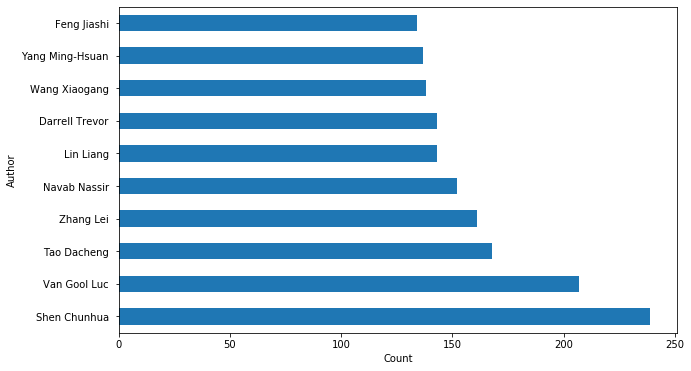

In [4]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)
# 根据作者频率绘制直⽅方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')
# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

接下来统计姓名姓，也就是 authors_parsed 字段中作者第⼀一个单词：

Text(0.5, 0, 'Count')

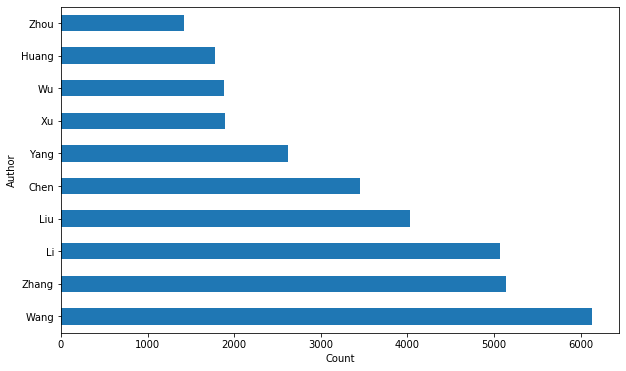

In [5]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)
plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')
names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

统计所有作者姓第⼀个字符的频率

Text(0.5, 0, 'Count')

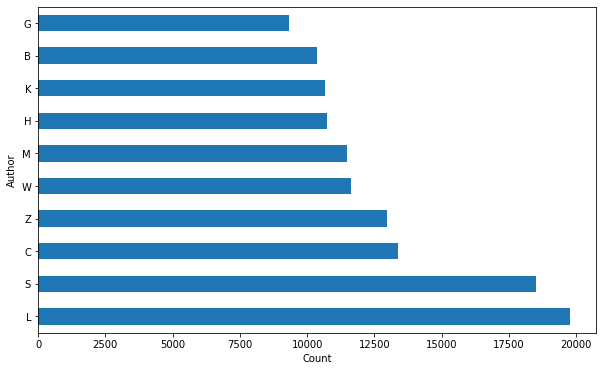

In [10]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames1 = [x[0] for x in authors_lastnames]
authors_lastnames1 = pd.DataFrame(authors_lastnames1)
plt.figure(figsize=(10, 6))
authors_lastnames1[0].value_counts().head(10).plot(kind='barh')
names = authors_lastnames1[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')